In [1]:
import numpy as np
import librosa
import copy
from sklearn.decomposition import PCA
import IPython
import IPython.display as ipd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import collections
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [2]:
root = "D:/iu/Semester_2/MLSP/assignment4/data/"

### Part 1: When to applaud?

In [3]:
ipd.display(ipd.Audio(root+"Piano_Clap.wav", rate = 16000))

In [4]:
piano =  scipy.io.loadmat(root + 'mfcc.mat')

In [5]:
X = np.array(piano['X'])
X.shape

(12, 962)

In [6]:
matr =  scipy.io.loadmat(root + 'MuSigma.mat')

In [7]:
mx = matr['mX']
sigma = matr['Sigma']

In [8]:
mx.shape,sigma.shape

((12, 2), (12, 12, 2))

In [9]:
m_piano = mx[:,0]
m_claps = mx[:,1]

In [10]:
m_claps.shape,m_piano.shape

((12,), (12,))

In [11]:
cov_piano = sigma[:,:,0]
cov_claps = sigma[:,:,1]
cov_claps.shape,cov_piano.shape

((12, 12), (12, 12))

In [12]:
piano_data = multivariate_normal.pdf(np.transpose(X),cov=cov_piano,mean=m_piano)

In [13]:
claps_data = multivariate_normal.pdf(np.transpose(X),cov=cov_claps,mean=m_claps)

In [14]:
P = np.vstack((piano_data,claps_data))

In [15]:
P.shape

(2, 962)

In [16]:
pdf_sum = np.sum(P,axis=0)
p_curl = P/pdf_sum

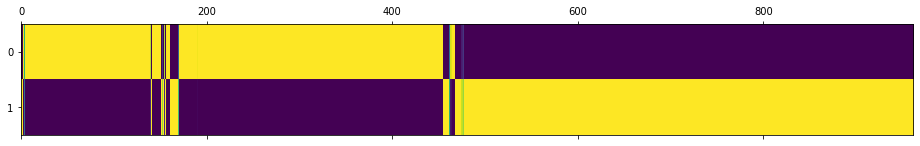

In [17]:

plt.matshow(p_curl,aspect = 'auto');

In [18]:
T = np.array([[0.9,0.1],[0,1]])
T.shape,T

((2, 2), array([[0.9, 0.1],
        [0. , 1. ]]))

In [19]:
new_pos=np.zeros(p_curl.shape)

In [20]:
new_pos.shape

(2, 962)

In [21]:
new_pos[:,0]=p_curl[:,0]

In [22]:
for i in range(1,962):
    b = np.argmax(new_pos[:,i-1])
    new_pos[:,i]=T[b]*p_curl[:,i]
    new_pos[:,i]=new_pos[:,i]/np.sum(new_pos[:,i])

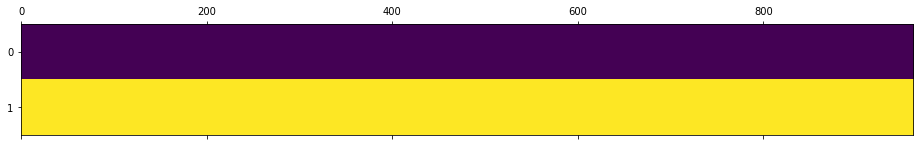

In [23]:
plt.matshow(new_pos,aspect='auto')

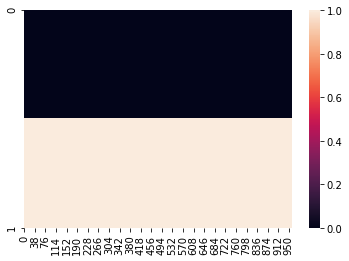

In [24]:
sns.heatmap(new_pos)

In [25]:
new_viterbi = np.zeros(p_curl.shape)
B = np.zeros(p_curl.shape)

In [26]:
new_viterbi[:,0]=p_curl[:,0]

In [27]:
for i in range(1,962):
    for j in range(2):
        b = np.argmax(T[:,j]*new_viterbi[:,i-1])
        B[j,i]=b
        new_viterbi[j,i]=T[b,j]*new_viterbi[b,i-1]*P[j,i]
    new_viterbi[:,i]=new_viterbi[:,i]/np.sum(new_viterbi[:,i])

In [28]:
x = np.argmax(new_viterbi[:,961])

In [29]:
back_track = np.zeros(p_curl.shape)
back_track.shape

(2, 962)

In [30]:
back_track[x,961] = 1

In [31]:
i = 960
while i >= 0:
    x = int(B[x,i])
#     print(s)
    back_track[x,i]=1
    i-=1
    

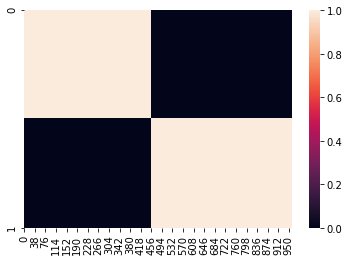

In [32]:
# plt.matshow(back_track);
sns.heatmap(back_track);

The output signifies that the black portion is the part where either the piano is not playing or the claps are not there. The matrix correctly shows that when the pink portion(top left) is playing the claps are absent(black portion below the pink part) and when the piano is done, the claps start. The slice at 456th sequence number is the differentiating slice. 